# Решение системы уравнений хищник-жертва

$$ \frac{dx}{dt} = x(2 - y - x) $$

$$ \frac{dy}{dt} = -y(1 - 1.5x) $$

state 1.0 1.0 0


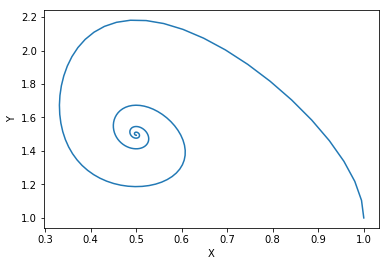

In [2]:
%matplotlib inline

from matplotlib import animation, pyplot as plt
from scipy.integrate import odeint
from numpy import arange

def OdeSystem(state, t):
    x, y = state
    d_x = x * (2 - y - x)
    d_y = -y * (1 - 2 * x)
    return [d_x, d_y]

t = arange(0, 20, .1)
init_state = [1, 1]
state = odeint(OdeSystem, init_state, t)

fig = plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(state[:, 0], state[:, 1], alpha=0.99)

def animate(i):
    print('state', state[i, 0], state[i, 1], i)
    return plt.plot(state[0:i, 0], state[0:i, 1], 'r-.', alpha=0.7)

ani = animation.FuncAnimation(fig, animate, interval=1)
plt.show()

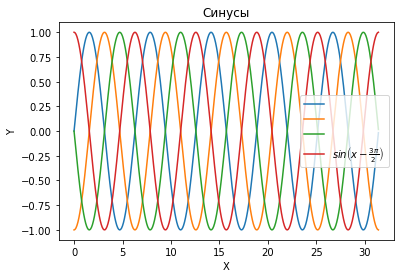

In [29]:
from numpy import pi, sin, arange
import matplotlib.pyplot as plt

x = arange(0, 10*pi, .1)
y1 = sin(x)
y2 = sin(x-pi/2)
y3 = sin(x-pi)
y4 = sin(x-3*pi/2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Синусы')
plt.legend(['', '', '', r'$ sin \left(x - \frac{3\pi}{2} \right) $'])
plt.show()

In [33]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

figure = {
    'data': [
        {
            'x': [1, 2],
            'y': [3, 3]
        }
    ],
    'layout': {
        'xaxis': {
            'range': [0, 5],
            'autorange': False
        },
        'yaxis': {
            'range': [0, 5],
            'autorange': False
        },
        'title': 'Graph Title',
        'updatemenus': [
            {
                'type': 'buttons',
                'buttons': [
                    {
                        'label': 'Play',
                        'method': 'animate',
                        'args': [
                            None,
                            {
                                'fromcurrent': True,
                            }
                        ]
                    },
                    {
                        'label': 'Pause',
                        'method': 'animate',
                        'args': [
                            None,
                            {
                                'frame': {'duration': 0, 'redraw': False},
                                'mode': 'immediate',
                                'transition': {'duration': 0}
                            }
                        ],
                    },
                ]
            }
        ]
    },
    'frames': [
        {'data': [{'x': [1, 2], 'y': [1, 2]}]},
        {'data': [{'x': [1, 4], 'y': [1, 4]}]},
        {'data': [{'x': [1, 2], 'y': [1, 2]}]},
        {'data': [{'x': [1, 4], 'y': [1, 4]}]},
        {'data': [{'x': [2, 2], 'y': [1, 2]}]},
        {'data': [{'x': [2, 4], 'y': [3, 4]}]},
        {'data': [{'x': [1, 2], 'y': [3, 2]}]},
        {'data': [{'x': [1, 4], 'y': [1, 4]}]},
        {
            'data': [{'x': [3, 4], 'y': [3, 4]}],
            'layout': {'title': 'Another Graph Title'}
        }
    ]
}

iplot(figure)

In [60]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

N = 4
a = [0] * 3**N
r1 = [10] * (3**N + 1)
r2 = [5] * (3**N + 1)

rad = [0]
theta = [0]
l = len(a)
for i in range(l):
    rad.append(N**2)
    theta.append(360/l * (i + 1/2))

data = [
    go.Scatterpolar(
        r = rad,
        theta = theta,
        mode = 'markers',
        marker = dict(
            color = 'rgba(255, 0, 50, .5)',
            size = 12
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title = 'Summator',
    radialaxis = {
        'range': [0, N**2 + 10],
        'autorange': False
    },
    updatemenus = [
        {
            'type': 'buttons',
            'buttons': [
                {
                    'label': 'Play',
                    'method': 'animate',
                    'args': [
                        None,
                        {
                            'fromcurrent': True,
                        }
                    ]
                },
                {
                    'label': 'Pause',
                    'method': 'animate',
                    'args': [
                        None,
                        {
                            'frame': {'duration': 0, 'redraw': False},
                            'mode': 'immediate',
                            'transition': {'duration': 0}
                        }
                    ],
                },
            ]
        }
    ]
)

frames = [
    {
        'data': [
            go.Scatterpolar(
                r = r1,
                theta = theta,
                mode = 'markers',
                marker = dict(
                    color = 'rgba(155, 100, 50, .5)',
                    size = 12
                )
            )
        ]
    },
    {
        'data': [
            go.Scatterpolar(
                r = r2,
                theta = theta,
                mode = 'markers',
                marker = dict(
                    color = 'rgba(55, 200, 50, .5)',
                    size = 12
                )
            )
        ]
    }
]

fig = go.Figure(data=data, layout=layout, frames=frames)
iplot(fig)